In [47]:
import tensorflow as tf
import numpy as np

In [23]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


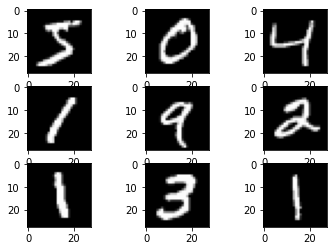

In [55]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# summarize loaded dataset
print(f'Train: X={train_X.shape}, y={train_y.shape}')
print(f'Test: X={test_X.shape}, y={test_y.shape}')
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [56]:
# reshape dataset to have a single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# apply one hot encoding to target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [57]:
# convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# normalize to range 0-1
train_X /= 255.0
test_X /= 255.0

In [58]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [59]:
model.fit(train_X, train_y, epochs=12, batch_size=500)

Epoch 1/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.3420 - accuracy: 0.8965
Epoch 2/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0775 - accuracy: 0.9764
Epoch 3/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0543 - accuracy: 0.9834
Epoch 4/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0438 - accuracy: 0.9868
Epoch 5/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0350 - accuracy: 0.9891
Epoch 6/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0335 - accuracy: 0.9893
Epoch 7/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 8/12
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 9/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 10/12
60000/60000 [=====================

In [60]:
model.save('mnist.h5')

In [61]:
results = model.evaluate(test_X, test_y, batch_size=128)
print(results)

10000/10000 [==============================] - 5s 545us/step
[0.023282262635394, 0.9933000206947327]


In [42]:
test_X[0].shape

(28, 28, 1)

In [65]:
for i in range(9):
    print(model.predict_classes(np.expand_dims(test_X[i], axis=0)))

[7]
[2]
[1]
[0]
[4]
[1]
[4]
[9]
[5]


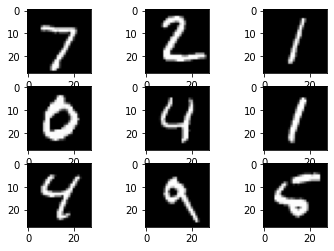

In [52]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()